# PTID-CDS-JUL-24-2007

# Automobile imports price prediction

Automobiles price prediction is a crucial task in the automotive industry, as it helps manufacturers, dealers, and buyers make informed decisions regarding the valuation and pricing of vehicles. The price of an automobile is influenced by various factors such as the make, model, engine size, horsepower, fuel type, and numerous other attributes. Accurately predicting car prices can provide valuable insights for optimizing pricing strategies and understanding market trends. With the growing availability of data, machine learning techniques have become powerful tools for analyzing these features and developing predictive models that can estimate car prices based on historical data. 

In this project, we explore various machine learning algorithms to predict car prices, leveraging a dataset with diverse features. The dataset includes both numerical and categorical variables, which were analyzed for modeling. Multiple regression models were developed, including Linear Regression, Decision Tree, Random Forest, and XGBoost, with the aim of identifying the most effective model for predicting car prices.

 ## Data Loading and Inspection

First lets import basic libraries and load our dataset

In [19]:
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv(r'C:\Users\DELL\Downloads\PRCP-1017-AutoPricePred\Data\auto_imports.csv')

Lets display the first few rows of the dataset to observe its structure

In [21]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


It can be observed that some columns contain "?" instead of numeric values. These are placeholders for missing data so we replace it by NaN

In [22]:
df.replace('?', np.nan, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Lets observe the columns and their datatypes

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [30]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [25]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [31]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,164.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,197.000000,201.000000,199.000000,199.000000,201.000000,201.000000,201.000000
mean,0.840796,122.000000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,35.442168,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.270793,0.319256,4.004965,37.553843,480.521824,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


## Handling misssing values

Lets perform a basic check for missing values

In [32]:
df.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

For numeric columns we fill the missing data with median values

In [33]:
df['normalized-losses'].fillna(df['normalized-losses'].median(), inplace=True)
df['bore'].fillna(df['bore'].median(), inplace=True)
df['stroke'].fillna(df['stroke'].median(), inplace=True)
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)
df['peak-rpm'].fillna(df['peak-rpm'].median(), inplace=True)

For categorical columns we fill the missing data with mode

In [34]:
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)

Let's check again to confirm that all missing values are filled

In [35]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

# Exploratory Data Analysis (EDA)

EDA is used to understand data in depth and learn its different characteristics and understand the relationships between features and target

## Univariate Analysis

We start by analyzing individual features, especially price

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

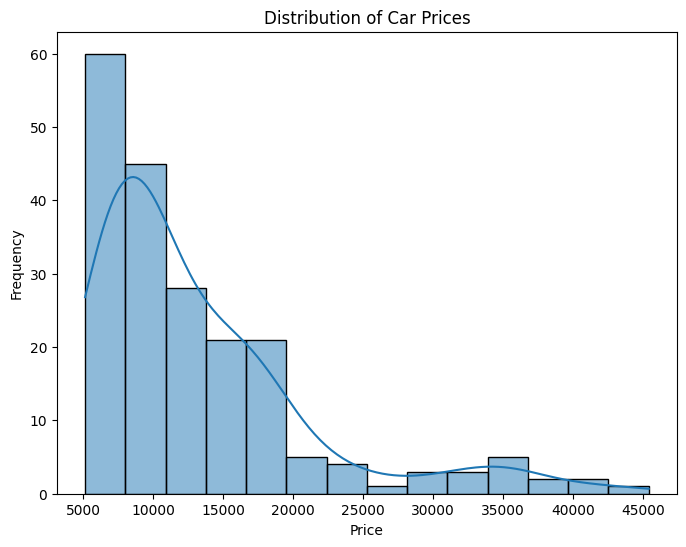

In [37]:
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

**Observations**:

* The distribution is skewed to the right, indicating that there are more cars with lower prices than higher prices.
* The peak of the distribution is around the 5,000-10,000 price range, suggesting that this is the most common price range for cars
* The tail of the distribution extending to the right, indicates there are a few cars with very high prices.
* The distribution follows an exponential distribution. This is often observed where there is a natural limit (in this case, the maximum price) and the probability of observing higher values decreases exponentially.

## Correlation Analysis

Let's Identify how the numeric features are correlated with price.

C:\Users\DELL\AppData\Local\Temp\ipykernel_5312\3626776325.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


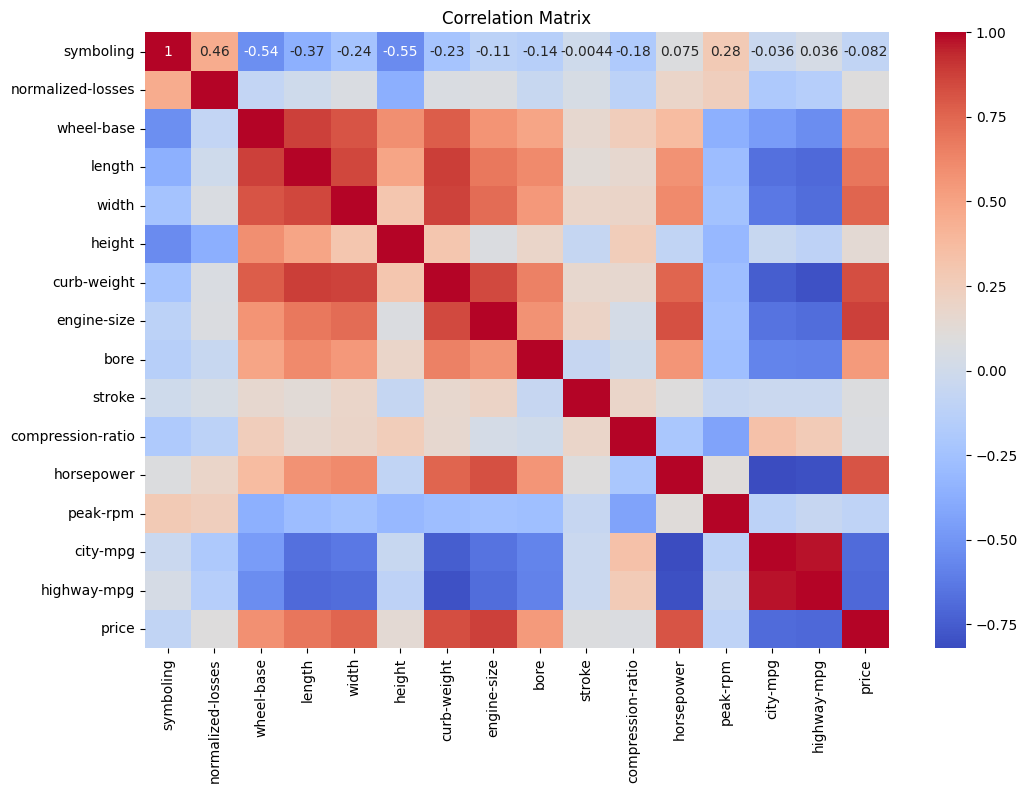

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Observations**:

*Positive correlations*:

* Price and engine size: Cars with larger engines tend to have higher prices.
* Wheelbase, length, and width: These dimensions are highly correlated with each other, indicating that cars with longer wheelbases tend to be longer and wider.
* City-mpg and highway-mpg: Cars with better fuel efficiency in the city tend to also have better fuel efficiency on the highway.

*Negative correlations*:

* Price and city-mpg, highway-mpg: Cars with higher prices tend to have lower fuel efficiency.
* Normalized-losses and wheelbase, length, width: Cars with higher normalized-losses (indicating more insurance claims) tend to be smaller in size.

## Scatter Plots

Lets explore the relationships between important features like horsepower, engine-size, curb-weight, etc., and price.

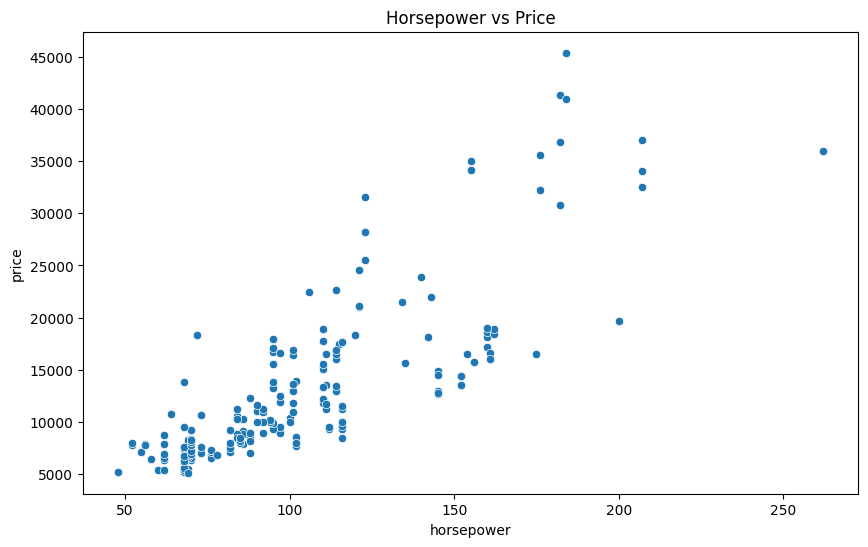

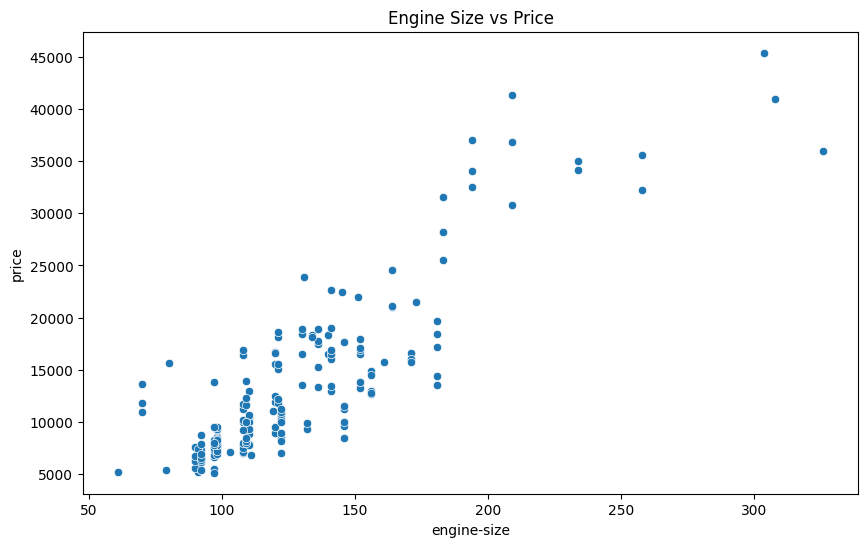

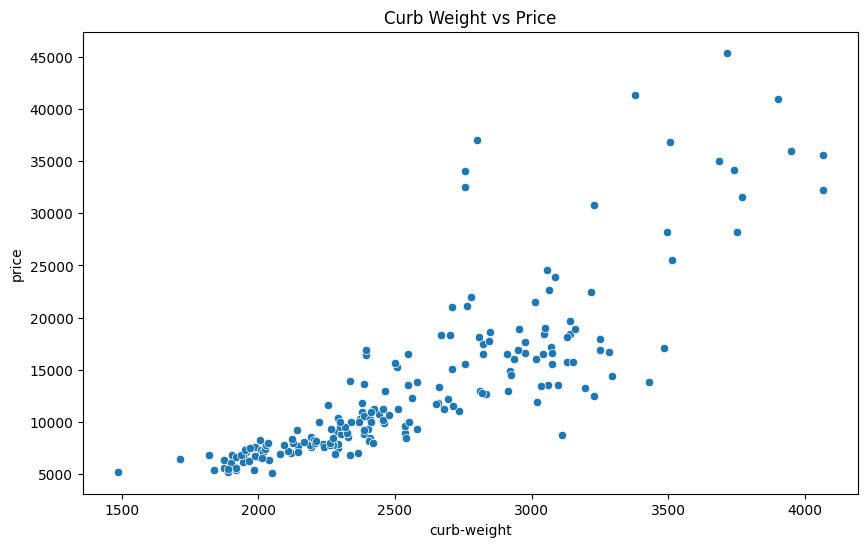

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='price', data=df)
plt.title('Horsepower vs Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='engine-size', y='price', data=df)
plt.title('Engine Size vs Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='curb-weight', y='price', data=df)
plt.title('Curb Weight vs Price')
plt.show()

**Observations**:

* Overall positive correlation: All show a positive relationship between the independent variable (horsepower, engine size, or curb weight) and price.
* Varying degrees of correlation: The strength of the correlation differs: engine size has the strongest, followed by curb weight, and then horsepower.
* Outliers: Outliers exist in each plot, suggesting that there are specific car models or situations that don't follow the general trends.

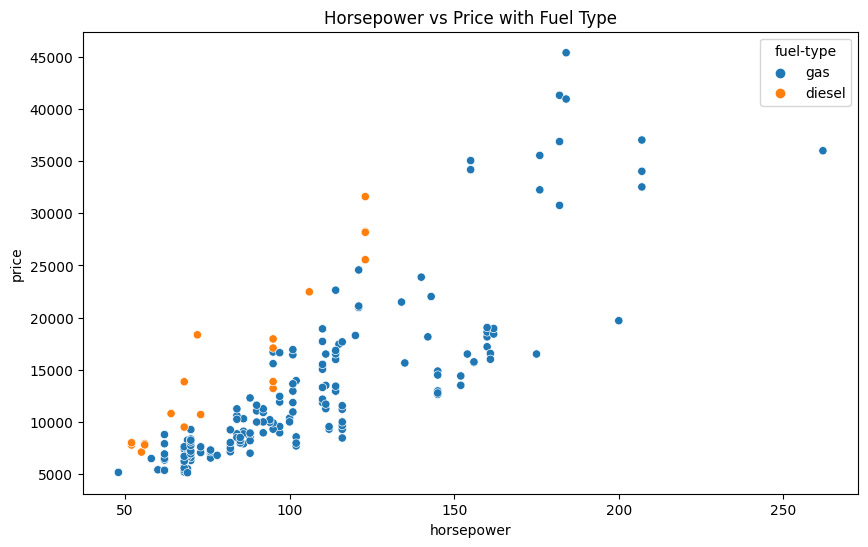

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='price', hue='fuel-type', data=df)
plt.title('Horsepower vs Price with Fuel Type')
plt.show()

**Observations:**
* There is a general positive correlation between horsepower and price.
* Gas and diesel cars have different patterns in terms of horsepower and price. Gas cars have a wider range of horsepower and prices while Diesel cars tend to have a narrower range of horsepower and prices.

## Bar Plots

For categorical features like make, fuel-type, aspiration, num-of-doors, etc., we can analyze the distribution and see how they relate to price with bar plots

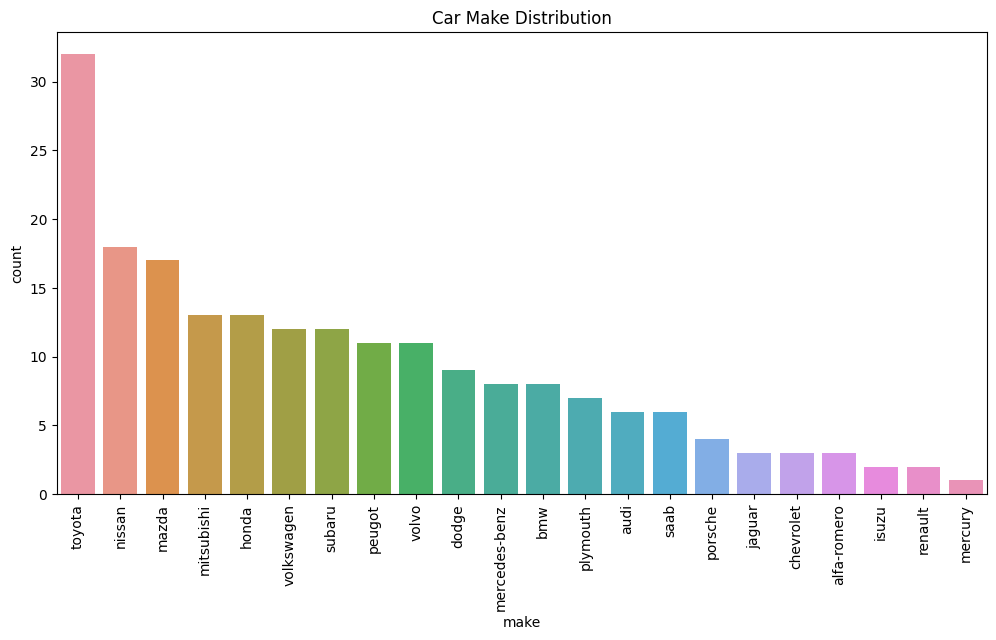

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(x='make', data=df, order=df['make'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Car Make Distribution')
plt.show()

**Observations**:
* Shows a clear Zipf's Law pattern, where the frequency decreases as its rank increases. This means the most popular make is significantly more common than the least popular one.

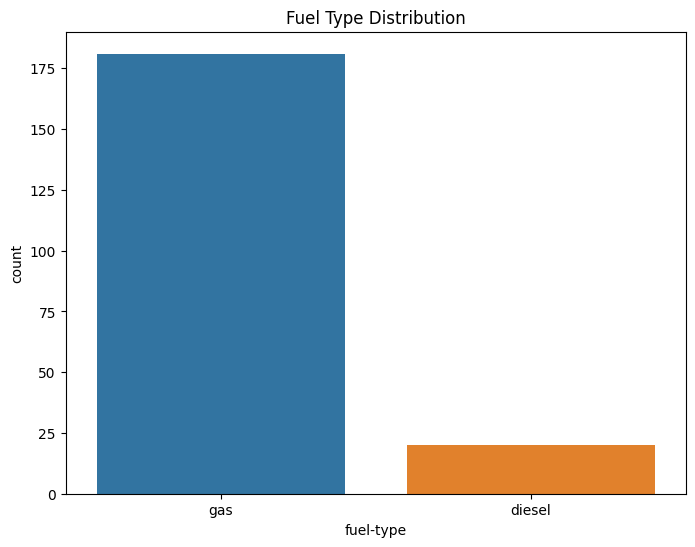

In [47]:
plt.figure(figsize=(8, 6))
sns.countplot(x='fuel-type', data=df)
plt.title('Fuel Type Distribution')
plt.show()

**Observations:**
* Gas is the most common fuel type, with a significantly higher count compared to diesel.

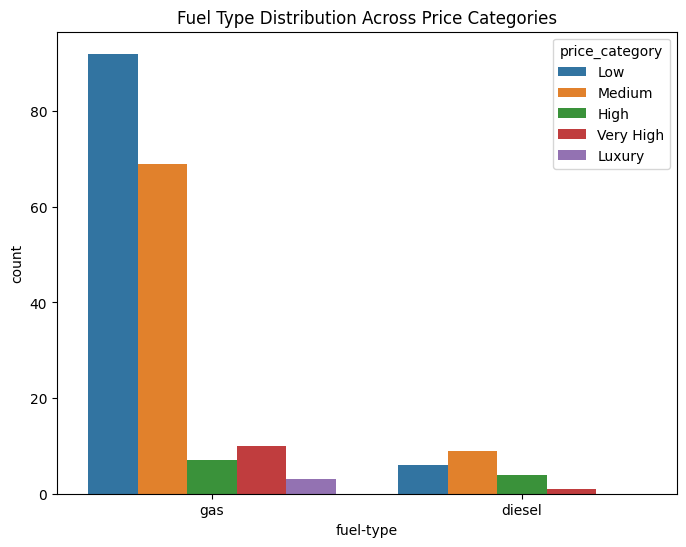

In [49]:
df['price_category'] = pd.cut(df['price'], bins=[0, 10000, 20000, 30000, 40000, 50000], labels=['Low', 'Medium', 'High', 'Very High', 'Luxury'])

plt.figure(figsize=(8, 6))
sns.countplot(x='fuel-type', hue='price_category', data=df)
plt.title('Fuel Type Distribution Across Price Categories')
plt.show()

**Observations**:
* Gas is the most common fuel type across all price categories.
* There is a higher proportion of diesel cars in the higher price categories compared to the lower price categories.
* The luxury price category has a relatively small number of cars, with a slightly higher proportion of diesel cars 

## Box plots

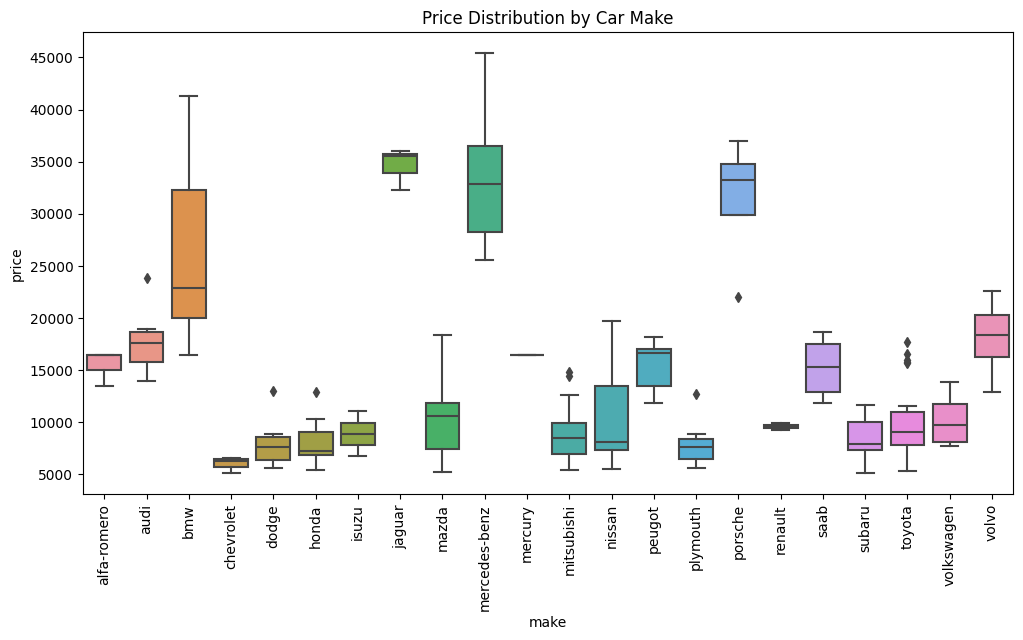

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='make', y='price', data=df)
plt.xticks(rotation=90)
plt.title('Price Distribution by Car Make')
plt.show()

**Observations**:
* The median prices (the lines within the boxes) vary across car makes. Some makes have higher median prices than others.
* The IQRs (the heights of the boxes) also vary, indicating different levels of price dispersion within each make.
* A few car makes have outliers, suggesting that there are some cars with prices that are significantly different from the majority of cars in that make.

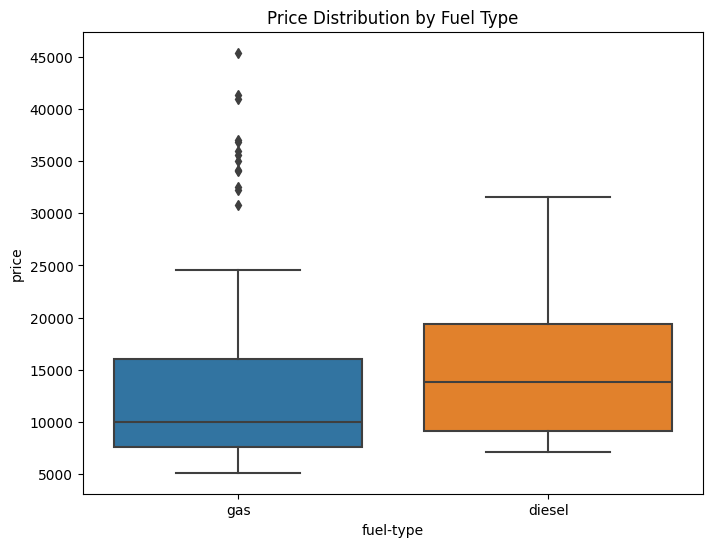

In [43]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='fuel-type', y='price', data=df)
plt.title('Price Distribution by Fuel Type')
plt.show()

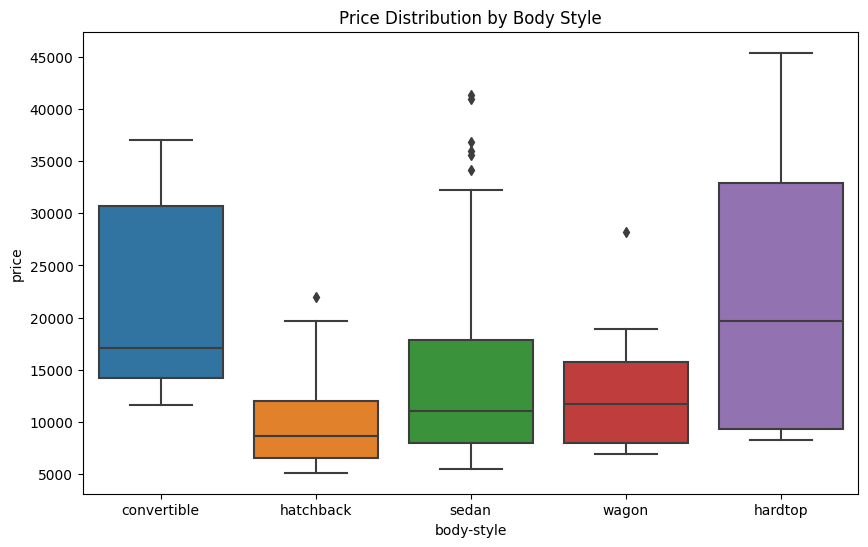

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='body-style', y='price', data=df)
plt.title('Price Distribution by Body Style')
plt.show()

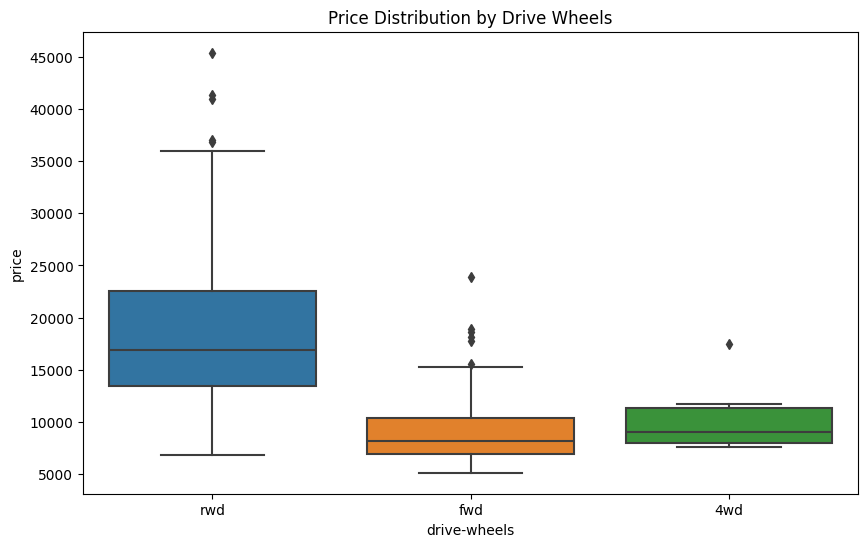

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='drive-wheels', y='price', data=df)
plt.title('Price Distribution by Drive Wheels')
plt.show()

**Observations**:
* Diesel cars often have higher prices, especially in certain body styles like trucks and SUVs.
* Convertibles and hardtops tend to be more expensive, while hatchbacks and sedans are more affordable.
* Rwd cars are often more expensive, especially in higher-end body styles. 4wd cars tend to have lower prices.
* The combination of fuel type, body style, and drive wheels can significantly influence the price of a car.

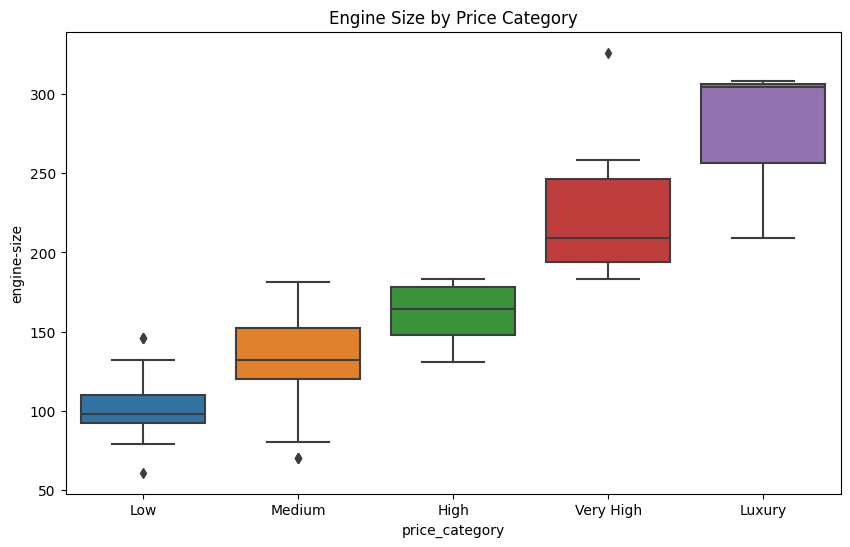

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_category', y='engine-size', data=df)
plt.title('Engine Size by Price Category')
plt.show()

**Observations**:
* As the price category increases, the median engine size tends to increase.
* The IQRs also increase with higher price categories, indicating a wider range of engine sizes in higher-priced cars.
* There are a few outliers in the higher price categories

## Pair plot

Lets explore how different categorical features interact with each other and influence the price by pairwise Correlation of Categorical Features

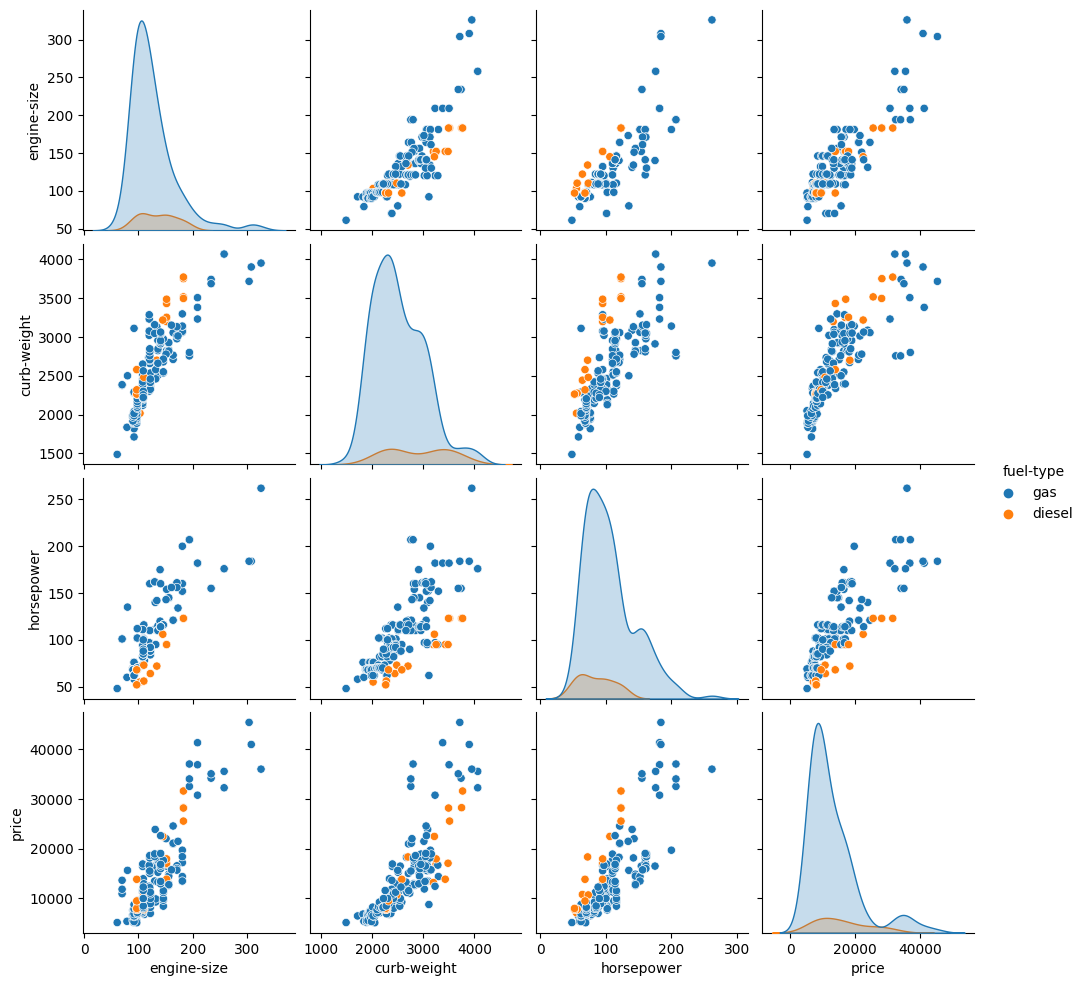

In [53]:
sns.pairplot(df, hue="fuel-type", vars=['engine-size', 'curb-weight', 'horsepower', 'price'])
plt.show()

**Observations**:
* There is a positive correlation between engine size and price, curb weight and price, and horsepower and price.
* There is a positive correlation between engine size and curb weight.
* There is a positive correlation between engine size and horsepower.
* The relationship between fuel type and the other variables is not as clear-cut. While there are some differences the overall trends are similar.

## Outlier analysis

Number of outliers in the dataset: 14


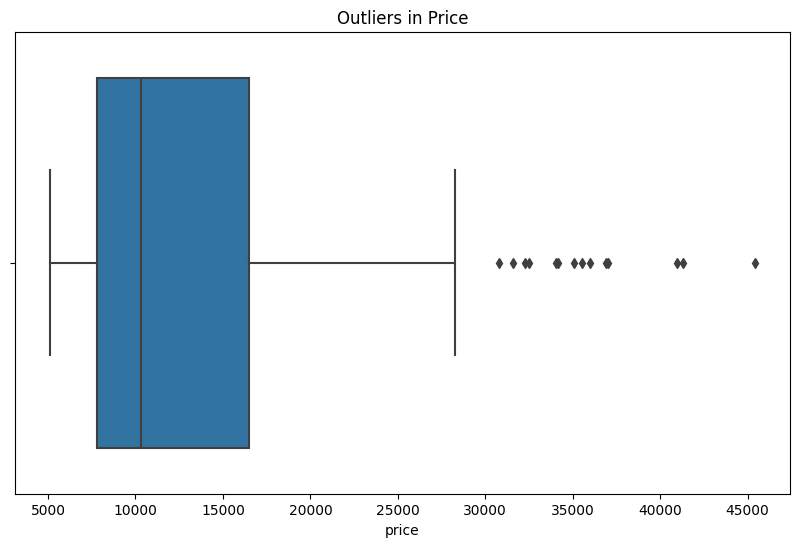

In [54]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"Number of outliers in the dataset: {len(outliers)}")

plt.figure(figsize=(10, 6))
sns.boxplot(x='price', data=df)
plt.title('Outliers in Price')
plt.show()


**Observations**:
* There are a few cars with prices that are significantly higher than the majority of cars in the dataset.
* There are more cars with lower prices than higher prices.
    

# Model building 

## Encoding categorical variables

Since many of your features are categorical, first we need to convert them to numerical form.

In [56]:
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

 ## Train-Test Split

Lets go ahead and split the dataset into training and test sets.

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

Linear Regression is a simple and interpretable machine learning algorithm used for predicting continuous outcomes. It assumes a linear relationship between the input features and the target variable. 

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Lets initialize and train our Linear Regression model

In [59]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

## Evaluation

Then lets predict on the test set and evaluate our model's performance

In [60]:
y_pred_lr = lr_model.predict(X_test)

In [61]:
print("Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R²:", r2_score(y_test, y_pred_lr))

Linear Regression Performance:
MAE: 1149.6859937219024
MSE: 2486929.834344973
R²: 0.9796731064360467


Our Linear Regression model seems to perform quite well, with an R² score of 0.98, indicating that 98% of the variance in car prices can be explained by the model. The MAE is around 1149 which suggests on average the model's predictions are off by about $1,149 from the actual car prices.

# Random Forest Regressor

Random Forest is an ensemble learning algorithm that builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting. Each tree is trained on a random subset of the data and features.

In [62]:
from sklearn.ensemble import RandomForestRegressor

Lets define and train our Random Forest model

In [63]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Evaluation

Lets evaluate our Random Forest model performance

In [66]:
y_pred_rf = rf_model.predict(X_test)

In [67]:
print("Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))

Random Forest Performance:
MAE: 1742.4225203252033
MSE: 7405547.166310706
R²: 0.9394708419378939


Our Random Forest model seems to perform quite good with an R² value of 0.94, meaning the model explains 94% of the variance in car prices.
The MAE can be improved, but depending on the overall price range of cars (which goes up to 45,000), this error might be reasonable.

# Decision Tree Regressor

A Decision Tree is a non-linear model that splits the dataset into subsets based on feature values, creating a tree-like structure where each internal node represents a decision, and each leaf node represents a prediction. 

In [69]:
from sklearn.tree import DecisionTreeRegressor

In [70]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [71]:
y_pred_dt = dt_model.predict(X_test)

In [72]:
print("Decision Tree Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_dt))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_dt))
print("R-squared (R²):", r2_score(y_test, y_pred_dt))

Decision Tree Performance:
Mean Absolute Error (MAE): 1949.0731707317073
Mean Squared Error (MSE): 10306634.390243903
R-squared (R²): 0.9157588375193345


Our Decsion Tree model shows an R² value of 0.92 which is decent but there's room for improvement.
The MAE of around $1,949 shows the error in predictions is relatively significant, depending on tolerance level for inaccuracies in car price predictions.

# XGBoost Regressor

XGBoost (Extreme Gradient Boosting) is a boosting algorithm that builds decision trees sequentially, where each new tree corrects the errors of the previous ones. It has the ability to handle non-linear patterns and deliver high accuracy.

In [73]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [74]:
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgboost_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [75]:
y_pred_xgb = xgboost_model.predict(X_test)

In [76]:
print("XGBoost Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("R²:", r2_score(y_test, y_pred_xgb))

XGBoost Performance:
MAE: 1636.151974561738
MSE: 7513964.117562812
R²: 0.9385846853256226


The R² value of 0.94 suggests that our XGBoost model performs well and captures most of the variance car prices.
The MAE of 1636 is better than our Decision Tree and Random Forest models, which means it's predicting car prices with less error.

# Hyperparameter tuning 

Hyperparameter tuning is the process of searching for the best combination of hyperparameter values that give the model the best performance.

## For Decision Tree

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

 We define the parameter grid

In [82]:
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']  
}

Then we initialize the Decision Tree Regressor and and grid search with cross validation and fit the model with grid search

In [83]:
dt_model = DecisionTreeRegressor(random_state=42)

In [84]:
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)

In [85]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2', verbose=2)

We then use the best parameters and score to predict on test set

In [86]:
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best R² Score: 0.8741932049388105


In [87]:
best_dt_model = grid_search.best_estimator_
y_pred_best_dt = best_dt_model.predict(X_test)

In [88]:
print("Tuned Decision Tree Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_best_dt))
print("MSE:", mean_squared_error(y_test, y_pred_best_dt))
print("R²:", r2_score(y_test, y_pred_best_dt))

Tuned Decision Tree Performance:
MAE: 1937.3941868210698
MSE: 10613449.107354775
R²: 0.9132510908139636


The tuning did not significantly improve the performance of our Decision Tree model compared to the untuned version. The R² value is still around 0.91, and the MAE is nearly the same.

## For XGBoost

In [89]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

 We define the parameter grid

In [90]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

Then we initialize the XGBoost Regressor and and grid search with cross validation and fit the model with grid search

In [91]:
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

In [92]:
grid_search_xgb = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)

In [93]:
grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.2, 0.3],
                         'learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='r2', verbose=2)

 Then we identify the best parameters and score to predict test set

In [94]:
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best R² Score for XGBoost:", grid_search_xgb.best_score_)

Best Parameters for XGBoost: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best R² Score for XGBoost: 0.8988800287246704


In [95]:
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test)

In [96]:
print("Tuned XGBoost Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_best_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_best_xgb))
print("R²:", r2_score(y_test, y_pred_best_xgb))

Tuned XGBoost Performance:
MAE: 1663.2975419207316
MSE: 6977618.379000221
R²: 0.942968487739563


Our XGBoost model performance improved slightly with tuning, MSE lowered, meaning the model’s predictions are more accurate overall.
The R² score remained same, around 0.94, indicating the model still explains 94% of the variance in car prices.

# Comparison Report

In [97]:
import pandas as pd

For easy comparison we create a dictionary with the model names and their corresponding performance metrics 

In [98]:
data = {
    'Model': ['Linear Regression', 'Random Forest', 'Decision Tree', 'Tuned Decision Tree', 'XGBoost', 'Tuned XGBoost'],
    'MAE': [1149.69, 1742.42, 1949.07, 1937.39, 1636.15, 1663.30],
    'MSE': [2486929.83, 7405547.17, 10306634.39, 10613449.11, 7513964.12, 6977618.38],
    'R²': [0.98, 0.94, 0.92, 0.91, 0.94, 0.94]
}

summary_table = pd.DataFrame(data)

Lets print our summary Dataframe

In [99]:
summary_table

,Model,MAE,MSE,R²
0,Linear Regression,1149.69,2486929.83,0.98
1,Random Forest,1742.42,7405547.17,0.94
2,Decision Tree,1949.07,10306634.39,0.92
3,Tuned Decision Tree,1937.39,10613449.11,0.91
4,XGBoost,1636.15,7513964.12,0.94
5,Tuned XGBoost,1663.30,6977618.38,0.94


# Conclusion

* Linear Regression performed the best in terms of MAE and R², suggesting that it is the most accurate model in terms of overall fit and prediction accuracy. However its performance may degrade with more complex non-linear relationships in the data.

* Random Forest performed well with an R² of 0.94, but it had a higher MAE and MSE compared to Linear Regression, indicating more variance in the predictions.

* Decision Tree had the weakest performance in terms of both MAE and R², even after hyperparameter tuning. It shows that Decision Trees may not be the best fit for this problem.

* XGBoost performed strongly, with an R² of 0.94 and a relatively low MAE. After tuning, its MSE improved, making it a solid choice for predicting car prices

# Challenges faced

**Model Selection**: Deciding which models to use for predicting car prices was a key challenge. Different models, such as Linear Regression, Decision Tree, Random Forest, and XGBoost, were considered, and each has its strengths and weaknesses.

 **Hyperparameter Tuning**: Initial versions of Decision Tree and XGBoost models did not perform optimally, and hyperparameter tuning was required to improve their performance.
 
 **Evaluation Metric Selection**: Since it is a regression task, different evaluation metrics can give different views of model performance. For instance, MAE focuses on the average error, while MSE penalizes larger errors more heavily. Deciding which metric to prioritize was important.
 
 **Overfitting**: Some models like the Decision Tree were more prone to overfittingSome models, resulting in high accuracy on the training data but poor generalization to the test data.